In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from dna_features_viewer import GraphicFeature, GraphicRecord
# from tabulate import tabulate

In [31]:
df = pd.read_csv("./group/clusters_for_heatmap.tsv", delimiter="\t").iloc[:2, 3:47]
df

,babesia_bigemina_protein.faa,babesia_bovis_T2Bo_protein.faa,babesia_microti_strain_RI_protein.faa,babesia_ovata_protein.faa,babesia_sp._Xinjiang_protein.faa,besnoitia_besnoiti_protein.faa,cryptosporidium_felis_protein.faa,cryptosporidium_hominis_TU502_protein.faa,cryptosporidium_muris_RN66_protein.faa,cryptosporidium_parvum_Iowa_II_protein.faa,...,plasmodium_vinckei_protein.faa,plasmodium_vivax_protein.faa,plasmodium_yoelii_protein.faa,porospora_cf._gigantea_A_protein.faa,porospora_cf._gigantea_B_protein.faa,theileria_annulata_protein.faa,theileria_equi_strain_WA_protein.faa,theileria_orientalis_strain_Shintoku_protein.faa,theileria_parva_strain_Muguga_protein.faa,toxoplasma_gondii_ME49_protein.faa
0,CDR97401.1,EDO08491.1,CCF75508.1,GBE58587.1,ORM39934.1,PFH33007.1,KAF7458848.1,EAL36206.1,EEA04813.1,EAK88225.1,...,VEV58789.1,EDL47232.1,VTZ81344.1,KAH0487941.1,KAH0475830.1,CAI76849.1,AFZ81684.1,BAM41710.1,EAN32198.2,EPT30808.1
1,CDR97449.1,EDO08531.1,CTQ41552.1,GBE58534.1,*,PFH36348.1,KAF7459085.1,EAL37253.1,EEA07088.1,EAK90283.1,...,VEV56045.1,EDL45028.1,VTZ77524.1,KAH0486314.1,KAH0483389.1,CAI76889.1,AFZ81729.1,BAM41668.1,EAN32247.1,EPT30679.1


In [67]:
for i in range(2):
    with open(f'cluster_{i}.fasta', 'w') as f:
        for j, name in enumerate(df.columns):
            gene = df.iloc[i, j]
            with open('./group/faa/'+name, 'r') as r:
                allow_to_write = False
                for line in r:
                    if line.split(' ')[0] == '>'+gene:
                        allow_to_write = True
                        f.write('>'+gene+'\n')
                        continue
                    if allow_to_write:
                        if line[0] != '>':
                            f.write(line)
                        else:
                            break

# Alignment 1

In [68]:
!./muscle5.1.linux_intel64 -align cluster_0.fasta -output cluster_0_aligned.fasta


muscle 5.1.linux64 [12f0e2]  8.1Gb RAM, 8 cores
Built Jan 13 2022 23:17:13
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 23 seqs, avg length 188, max 204

00:00 4.0Mb  CPU has 8 cores, running 8 threads
00:01 533Mb   100.0% Calc posteriors
00:01 533Mb   100.0% Consistency (1/2)
00:01 533Mb   100.0% Consistency (2/2)
00:01 533Mb   100.0% UPGMA5           
00:01 534Mb   100.0% Refining


In [69]:
!./muscle5.1.linux_intel64 -align cluster_1.fasta -output cluster_1_aligned.fasta


muscle 5.1.linux64 [12f0e2]  8.1Gb RAM, 8 cores
Built Jan 13 2022 23:17:13
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 23 seqs, avg length 403, max 421

00:00 4.0Mb  CPU has 8 cores, running 8 threads
00:01 540Mb   100.0% Calc posteriors
00:01 540Mb   100.0% Consistency (1/2)
00:01 540Mb   100.0% Consistency (2/2)
00:01 540Mb   100.0% UPGMA5           
00:01 540Mb   100.0% Refining


In [22]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/002/375/GCF_900002375.2_GCA_900002375/GCF_900002375.2_GCA_900002375_protein.faa.gz

--2022-06-21 10:20:38--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/002/375/GCF_900002375.2_GCA_900002375/GCF_900002375.2_GCA_900002375_protein.faa.gz
           => ‘GCF_900002375.2_GCA_900002375_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.228, 130.14.250.13, 2607:f220:41f:250::228, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.228|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/900/002/375/GCF_900002375.2_GCA_900002375 ... done.
==> SIZE GCF_900002375.2_GCA_900002375_protein.faa.gz ... 2068514
==> PASV ... done.    ==> RETR GCF_900002375.2_GCA_900002375_protein.faa.gz ... done.
Length: 2068514 (2.0M) (unauthoritative)

GCF_900002375.2_GCA 100%[===================>]   1.97M  1.10MB/s    in 1.8s    

2022-06-21 10:20:43 (1.10 MB/s) - ‘GCF_900002375.2_GCA_900002375_protein.faa.gz’ saved [2068514]



In [25]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/002/335/GCF_900002335.2_PCHAS01/GCF_900002335.2_PCHAS01_protein.faa.gz

--2022-06-21 10:23:13--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/002/335/GCF_900002335.2_PCHAS01/GCF_900002335.2_PCHAS01_protein.faa.gz
           => ‘GCF_900002335.2_PCHAS01_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.228, 130.14.250.13, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.228|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/900/002/335/GCF_900002335.2_PCHAS01 ... done.
==> SIZE GCF_900002335.2_PCHAS01_protein.faa.gz ... 2117346
==> PASV ... done.    ==> RETR GCF_900002335.2_PCHAS01_protein.faa.gz ... done.
Length: 2117346 (2.0M) (unauthoritative)

GCF_900002335.2_PCH 100%[===================>]   2.02M  1.24MB/s    in 1.6s    

2022-06-21 10:23:18 (1.24 MB/s) - ‘GCF_900002335.2_PCHAS01_protein.faa.gz’ saved [2117346]



In [33]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/002/765/GCF_000002765.5_GCA_000002765/GCF_000002765.5_GCA_000002765_protein.faa.gz

--2022-06-21 10:37:49--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/002/765/GCF_000002765.5_GCA_000002765/GCF_000002765.5_GCA_000002765_protein.faa.gz
           => ‘GCF_000002765.5_GCA_000002765_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/000/002/765/GCF_000002765.5_GCA_000002765 ... done.
==> SIZE GCF_000002765.5_GCA_000002765_protein.faa.gz ... 2427728
==> PASV ... done.    ==> RETR GCF_000002765.5_GCA_000002765_protein.faa.gz ... done.
Length: 2427728 (2.3M) (unauthoritative)

GCF_000002765.5_GCA 100%[===================>]   2.31M   966KB/s    in 2.5s    

2022-06-21 10:37:55 (966 KB/s) - ‘GCF_000002765.5_GCA_000002765_protein.faa.gz’ saved [2427728]



In [37]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/602/025/GCF_001602025.1_ASM160202v1/GCF_001602025.1_ASM160202v1_protein.faa.gz

--2022-06-21 10:40:35--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/602/025/GCF_001602025.1_ASM160202v1/GCF_001602025.1_ASM160202v1_protein.faa.gz
           => ‘GCF_001602025.1_ASM160202v1_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.7, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/001/602/025/GCF_001602025.1_ASM160202v1 ... done.
==> SIZE GCF_001602025.1_ASM160202v1_protein.faa.gz ... 2228896
==> PASV ... done.    ==> RETR GCF_001602025.1_ASM160202v1_protein.faa.gz ... done.
Length: 2228896 (2.1M) (unauthoritative)

GCF_001602025.1_ASM 100%[===================>]   2.12M  1.06MB/s    in 2.0s    

2022-06-21 10:40:40 (1.06 MB/s) - ‘GCF_001602025.1_ASM160202v1_protein.faa.gz’ saved [2228896]



In [40]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/005/855/GCF_900005855.1_PGAL8A/GCF_900005855.1_PGAL8A_protein.faa.gz

--2022-06-21 10:42:21--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/005/855/GCF_900005855.1_PGAL8A/GCF_900005855.1_PGAL8A_protein.faa.gz
           => ‘GCF_900005855.1_PGAL8A_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.229, 130.14.250.13, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.229|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/900/005/855/GCF_900005855.1_PGAL8A ... done.
==> SIZE GCF_900005855.1_PGAL8A_protein.faa.gz ... 2198175
==> PASV ... done.    ==> RETR GCF_900005855.1_PGAL8A_protein.faa.gz ... done.
Length: 2198175 (2.1M) (unauthoritative)

GCF_900005855.1_PGA 100%[===================>]   2.10M  1.39MB/s    in 1.5s    

2022-06-21 10:42:26 (1.39 MB/s) - ‘GCF_900005855.1_PGAL8A_protein.faa.gz’ saved [2198175]



In [44]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/006/355/GCF_000006355.2_GCA_000006355.2/GCF_000006355.2_GCA_000006355.2_protein.faa.gz

--2022-06-21 10:45:58--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/006/355/GCF_000006355.2_GCA_000006355.2/GCF_000006355.2_GCA_000006355.2_protein.faa.gz
           => ‘GCF_000006355.2_GCA_000006355.2_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.11, 2607:f220:41e:250::11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/000/006/355/GCF_000006355.2_GCA_000006355.2 ... done.
==> SIZE GCF_000006355.2_GCA_000006355.2_protein.faa.gz ... 2407451
==> PASV ... done.    ==> RETR GCF_000006355.2_GCA_000006355.2_protein.faa.gz ... done.
Length: 2407451 (2.3M) (unauthoritative)

GCF_000006355.2_GCA 100%[===================>]   2.30M  1.06MB/s    in 2.2s    

2022-06-21 10:46:04 (1.06 MB/s) - ‘GCF_000006355.2_GCA_000006355.2_protein.faa.gz’ saved [2407451]



In [47]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/090/045/GCF_900090045.1_PmUG01/GCF_900090045.1_PmUG01_protein.faa.gz

--2022-06-21 10:47:43--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/090/045/GCF_900090045.1_PmUG01/GCF_900090045.1_PmUG01_protein.faa.gz
           => ‘GCF_900090045.1_PmUG01_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 2607:f220:41f:250::230, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/900/090/045/GCF_900090045.1_PmUG01 ... done.
==> SIZE GCF_900090045.1_PmUG01_protein.faa.gz ... 2483991
==> PASV ... done.    ==> RETR GCF_900090045.1_PmUG01_protein.faa.gz ... done.
Length: 2483991 (2.4M) (unauthoritative)

GCF_900090045.1_PmU 100%[===================>]   2.37M  1.12MB/s    in 2.1s    

2022-06-21 10:47:49 (1.12 MB/s) - ‘GCF_900090045.1_PmUG01_protein.faa.gz’ saved [2483991]



In [51]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/601/855/GCF_001601855.1_ASM160185v1/GCF_001601855.1_ASM160185v1_protein.faa.gz

--2022-06-21 11:07:25--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/601/855/GCF_001601855.1_ASM160185v1/GCF_001601855.1_ASM160185v1_protein.faa.gz
           => ‘GCF_001601855.1_ASM160185v1_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.7, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/001/601/855/GCF_001601855.1_ASM160185v1 ... done.
==> SIZE GCF_001601855.1_ASM160185v1_protein.faa.gz ... 2227309
==> PASV ... done.    ==> RETR GCF_001601855.1_ASM160185v1_protein.faa.gz ... done.
Length: 2227309 (2.1M) (unauthoritative)

GCF_001601855.1_ASM 100%[===================>]   2.12M  1.02MB/s    in 2.1s    

2022-06-21 11:07:30 (1.02 MB/s) - ‘GCF_001601855.1_ASM160185v1_protein.faa.gz’ saved [2227309]



In [54]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/005/765/GCF_900005765.1_PRELSG/GCF_900005765.1_PRELSG_protein.faa.gz

--2022-06-21 11:09:20--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/005/765/GCF_900005765.1_PRELSG/GCF_900005765.1_PRELSG_protein.faa.gz
           => ‘GCF_900005765.1_PRELSG_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.12, 2607:f220:41e:250::11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/900/005/765/GCF_900005765.1_PRELSG ... done.
==> SIZE GCF_900005765.1_PRELSG_protein.faa.gz ... 2160539
==> PASV ... done.    ==> RETR GCF_900005765.1_PRELSG_protein.faa.gz ... done.
Length: 2160539 (2.1M) (unauthoritative)

GCF_900005765.1_PRE 100%[===================>]   2.06M  1019KB/s    in 2.1s    

2022-06-21 11:09:26 (1019 KB/s) - ‘GCF_900005765.1_PRELSG_protein.faa.gz’ saved [2160539]



In [57]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/097/015/GCF_900097015.1_PADLG01/GCF_900097015.1_PADLG01_protein.faa.gz

--2022-06-21 11:10:54--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/097/015/GCF_900097015.1_PADLG01/GCF_900097015.1_PADLG01_protein.faa.gz
           => ‘GCF_900097015.1_PADLG01_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.7, 2607:f220:41f:250::228, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/900/097/015/GCF_900097015.1_PADLG01 ... done.
==> SIZE GCF_900097015.1_PADLG01_protein.faa.gz ... 2404984
==> PASV ... done.    ==> RETR GCF_900097015.1_PADLG01_protein.faa.gz ... done.
Length: 2404984 (2.3M) (unauthoritative)

GCF_900097015.1_PAD 100%[===================>]   2.29M   998KB/s    in 2.4s    

2022-06-21 11:11:00 (998 KB/s) - ‘GCF_900097015.1_PADLG01_protein.faa.gz’ saved [2404984]



In [60]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/681/995/GCF_900681995.1_PVVCY_v1/GCF_900681995.1_PVVCY_v1_protein.faa.gz

--2022-06-21 11:12:17--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/681/995/GCF_900681995.1_PVVCY_v1/GCF_900681995.1_PVVCY_v1_protein.faa.gz
           => ‘GCF_900681995.1_PVVCY_v1_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 2607:f220:41f:250::228, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/900/681/995/GCF_900681995.1_PVVCY_v1 ... done.
==> SIZE GCF_900681995.1_PVVCY_v1_protein.faa.gz ... 2072676
==> PASV ... done.    ==> RETR GCF_900681995.1_PVVCY_v1_protein.faa.gz ... done.
Length: 2072676 (2.0M) (unauthoritative)

GCF_900681995.1_PVV 100%[===================>]   1.98M   969KB/s    in 2.1s    

2022-06-21 11:12:23 (969 KB/s) - ‘GCF_900681995.1_PVVCY_v1_protein.faa.gz’ saved [2072676]



In [64]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/002/385/GCF_900002385.2_GCA_900002385/GCF_900002385.2_GCA_900002385_protein.faa.gz

--2022-06-21 11:14:21--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/002/385/GCF_900002385.2_GCA_900002385/GCF_900002385.2_GCA_900002385_protein.faa.gz
           => ‘GCF_900002385.2_GCA_900002385_protein.faa.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 2607:f220:41e:250::11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/900/002/385/GCF_900002385.2_GCA_900002385 ... done.
==> SIZE GCF_900002385.2_GCA_900002385_protein.faa.gz ... 2245574
==> PASV ... done.    ==> RETR GCF_900002385.2_GCA_900002385_protein.faa.gz ... done.
Length: 2245574 (2.1M) (unauthoritative)

GCF_900002385.2_GCA 100%[===================>]   2.14M   919KB/s    in 2.4s    

2022-06-21 11:14:27 (919 KB/s) - ‘GCF_900002385.2_GCA_900002385_protein.faa.gz’ saved [2245574]



In [65]:
!gzip -d GCF*

gzip: GCF_000002415.2_ASM241v2_feature_table.txt: unknown suffix -- ignored
gzip: GCF_000002415.2_ASM241v2_genomic.fna: unknown suffix -- ignored
gzip: GCF_000002415.2_ASM241v2_genomic.gbff: unknown suffix -- ignored
gzip: GCF_000002415.2_ASM241v2_genomic.gtf: unknown suffix -- ignored
gzip: GCF_000002415.2_ASM241v2_protein.faa: unknown suffix -- ignored
gzip: GCF_000002415.2_ASM241v2_protein.faa.diamond.dmnd: unknown suffix -- ignored
gzip: GCF_000321355.1_PcynB_1.0_feature_table.txt: unknown suffix -- ignored
gzip: GCF_000321355.1_PcynB_1.0_genomic.fna: unknown suffix -- ignored
gzip: GCF_000321355.1_PcynB_1.0_genomic.gbff: unknown suffix -- ignored
gzip: GCF_000321355.1_PcynB_1.0_genomic.gtf: unknown suffix -- ignored
gzip: GCF_000321355.1_PcynB_1.0_protein.faa: unknown suffix -- ignored
gzip: GCF_000321355.1_PcynB_1.0_protein.faa.diamond.dmnd: unknown suffix -- ignored
gzip: GCF_000524495.1_Plas_inui_San_Antonio_1_V1_feature_table.txt: unknown suffix -- ignored
gzip: GCF_000524495.

# Alignment 2

In [99]:
for i in range(2):
    with open(f'cluster_{i}.fasta', 'w') as f:
        for j, name in enumerate(df.columns):
            gene = df.iloc[i, j]
            name_fna = '_'.join(name.split('_')[:-1])+'_genomic.fna'
            name_ft = '_'.join(name.split('_')[:-1])+'_feature_table.txt'
            sequence = []
            tmp = list(SeqIO.parse('./group/fna/'+name_fna, format='fasta'))
            for s in tmp:
                sequence.append(str(s.seq).upper())
            sequence = ''.join(sequence)
            sequence = ''.join(sequence.split('\n'))
            with open('./group/ft/'+name_ft) as r:
                for line in r:
                    elems = line.split('\t')
                    if elems[0] == 'CDS' and elems[10] == gene and gene != '*':
                        f.write('>'+gene+'\n')
                        start, end = int(elems[7]), int(elems[8])
                        break
            f.write(sequence[start:end+1]+'\n')

In [100]:
!./muscle5.1.linux_intel64 -align cluster_0.fasta -output cluster_0_aligned.fasta


muscle 5.1.linux64 [12f0e2]  8.1Gb RAM, 8 cores
Built Jan 13 2022 23:17:13
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 40 seqs, avg length 886, max 5016

00:00 4.1Mb  CPU has 8 cores, running 8 threads
00:18 579Mb   100.0% Calc posteriors
00:35 579Mb   100.0% Consistency (1/2)
00:52 579Mb   100.0% Consistency (2/2)
00:52 579Mb   100.0% UPGMA5           
00:58 588Mb   100.0% Refining


In [96]:
!./muscle5.1.linux_intel64 -align cluster_1.fasta -output cluster_1_aligned.fasta


muscle 5.1.linux64 [12f0e2]  8.1Gb RAM, 8 cores
Built Jan 13 2022 23:17:13
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 40 seqs, avg length 1810, max 5694

00:00 4.1Mb  CPU has 8 cores, running 8 threads
01:43 691Mb   100.0% Calc posteriors
02:37 691Mb   100.0% Consistency (1/2)
03:34 691Mb   100.0% Consistency (2/2)
03:34 691Mb   100.0% UPGMA5           
04:03 691Mb   100.0% Refining


# Find appropriate clusters for drawing

## Cluster 7

In [102]:
df = pd.read_csv("./group/clusters_for_heatmap.tsv", delimiter="\t")
df

,# Species,Genes,Alg.-Conn.,babesia_bigemina_protein.faa,babesia_bovis_T2Bo_protein.faa,babesia_microti_strain_RI_protein.faa,babesia_ovata_protein.faa,babesia_sp._Xinjiang_protein.faa,besnoitia_besnoiti_protein.faa,cryptosporidium_felis_protein.faa,...,porospora_cf._gigantea_B,theileria_annulata,theileria_equi_strain_WA,theileria_orientalis_strain_Shintoku,theileria_parva_strain_Muguga,toxoplasma_gondii_ME49,z_sum,z_num,z_mean,z_max
0,40,40,0.43100,CDR97401.1,EDO08491.1,CCF75508.1,GBE58587.1,ORM39934.1,PFH33007.1,KAF7458848.1,...,0.0,0.0,0.0,0.0,0.0,674.1187,1.113952e+06,40,27848.805790,941334.2000
1,41,42,0.15800,CDR97449.1,EDO08531.1,CTQ41552.1,GBE58534.1,*,PFH36348.1,KAF7459085.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.045155e+06,41,25491.583251,941334.2000
2,41,42,0.24400,CDR98116.1,EDO05551.1,CCF75356.1,GBE62413.1,ORM41226.1,PFH37542.1,KAF7458337.1,...,*,0.0,0.0,0.0,0.0,941334.2,9.618378e+05,41,23459.459224,941334.2000
3,42,42,0.35200,CDR97994.1,EDO05804.1,CCF72813.1,GBE62516.1,ORM41308.1,PFH38232.1,KAF7456369.1,...,1244.881,0.0,883.5764,0.0,0.0,0.0,9.685356e+05,42,23060.370564,941334.2000
4,43,43,0.38300,CDR93831.1,EDO08613.1,SIO73357.1,*,ORM41791.1,PFH36191.1,KAF7456803.1,...,0.0,0.0,0.0,0.0,0.0,941334.2,9.641417e+05,43,22421.901109,941334.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,40,41,0.25200,CDR96821.1,*,*,GBE58899.1,*,PFH37384.1,KAF7457791.1,...,0.0,0.0,0.0,0.0,0.0,883.5764,2.022569e+03,40,50.564235,1138.9930
482,41,41,0.00757,CDR94413.1,EDO07321.1,CTQ41369.1,GBE60421.1,ORM39532.1,PFH34396.1,KAF7456442.1,...,0.0,0.0,*,0.0,0.0,0.0,1.567646e+03,41,38.235268,783.8230
483,41,41,0.01040,CDR94103.1,EDO06554.1,CCF73699.1,GBE60710.1,ORM41728.1,PFH35956.1,KAF7455810.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.555714e+03,41,37.944246,904.3200
484,41,41,0.04550,CDR94707.1,EDO07529.1,SJK86366.1,GBE60141.1,ORM39343.1,PFH36117.1,KAF7456495.1,...,0.0,0.0,0.0,0.0,0.0,0.0,8.835764e+02,41,21.550644,883.5764


In [127]:
selected_orgs = ['toxoplasma_gondii_ME49', 'plasmodium_vivax', 'plasmodium_coatneyi', 'neospora_caninum_Liverpool', 'besnoitia_besnoiti']
selected_files = ['toxoplasma_gondii_ME49_protein.faa', 'plasmodium_vivax_protein.faa', 'plasmodium_coatneyi_protein.faa', 'neospora_caninum_Liverpool_protein.faa', 'besnoitia_besnoiti_protein.faa']

In [126]:
df.loc[[7], selected_orgs]

,toxoplasma_gondii_ME49,plasmodium_vivax,plasmodium_coatneyi,neospora_caninum_Liverpool,besnoitia_besnoiti
7,13713.99,4831.423,12723.6,302785.5,38833.58


In [134]:
df.loc[[7], selected_files]

,toxoplasma_gondii_ME49_protein.faa,plasmodium_vivax_protein.faa,plasmodium_coatneyi_protein.faa,neospora_caninum_Liverpool_protein.faa,besnoitia_besnoiti_protein.faa
7,EPT29702.1,EDL45263.1,ANQ06682.1,CBZ52694.1,PFH37774.1


In [129]:
scores = df.loc[[7], selected_orgs].to_numpy().astype(float)[0]
genes = df.loc[[7], selected_files].to_numpy()[0]

In [241]:
zdna_coords = []
for i, name in enumerate(selected_orgs):
    with open('./group/hse22_project_Apicomplexans-main/data/all_files/intersection/'+name+'_intersection.bed', 'r') as f:
        for line in f:
            elems = line.split('\t')
            if elems[3] == genes[i]:
                zdna_coords.append([int(elems[1]), int(elems[2]), float(elems[8][:-2])])
                break

In [242]:
zdna_coords

[[813044, 813058, 13713.9],
 [617213, 617227, 4831.42],
 [671809, 671825, 12723.0],
 [758637, 758642, 302785.0],
 [755506, 755512, 38833.5]]

In [243]:
gene_coords = []
for i, name in enumerate(selected_orgs):
    with open('./group/ft/'+name+'_feature_table.txt', 'r') as f:
        for line in f:
            elems = line.split('\t')
            if elems[0] == 'CDS' and elems[10] == genes[i]:
                gene_coords.append([int(elems[7]), int(elems[8]), elems[9], genes[i]])

In [244]:
gene_coords

[[813151, 815788, '+', 'EPT29702.1'],
 [615847, 617141, '-', 'EDL45263.1'],
 [670315, 671738, '-', 'ANQ06682.1'],
 [758937, 761451, '+', 'CBZ52694.1'],
 [755806, 757980, '+', 'PFH37774.1']]

In [245]:
for i in range(len(gene_coords)):
    if gene_coords[i][2] == '+':
        gene_coords[i][1] = zdna_coords[i][1] + 700
    else:
        gene_coords[i][0] = zdna_coords[i][0] - 400

In [246]:
gene_coords

[[813151, 813758, '+', 'EPT29702.1'],
 [616813, 617141, '-', 'EDL45263.1'],
 [671409, 671738, '-', 'ANQ06682.1'],
 [758937, 759342, '+', 'CBZ52694.1'],
 [755806, 756212, '+', 'PFH37774.1']]

In [247]:
for i, _ in enumerate(zdna_coords):
    if gene_coords[i][2] == '-':
        gene_coords[i][2] = '+'
        zdna_coords[i][0] = gene_coords[i][0] - (zdna_coords[i][0] - gene_coords[i][1])
        zdna_coords[i][1] = gene_coords[i][0] - (zdna_coords[i][1] - gene_coords[i][1])
        zdna_coords[i][:2] = zdna_coords[i][-2:None:-1]

In [248]:
zdna_coords

[[813044, 813058, 13713.9],
 [616727, 616741, 4831.42],
 [671322, 671338, 12723.0],
 [758637, 758642, 302785.0],
 [755506, 755512, 38833.5]]

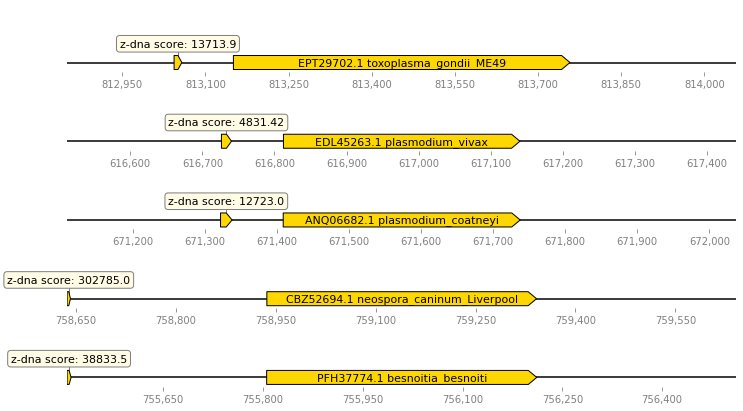

In [249]:
fig, ax = plt.subplots(nrows=5, ncols=1 ,figsize=(12, 7))

for i in range(5):
    record = GraphicRecord(sequence_length=1000000, features=[GraphicFeature(start=gene_coords[i][0], end=gene_coords[i][1], strand=-1 if gene_coords[i][2]=='-' else +1, color="#ffd700", label=gene_coords[i][3].split("\n")[0]+" "+selected_orgs[i]),
                                                             GraphicFeature(start=zdna_coords[i][0], end=zdna_coords[i][1], strand=-1 if gene_coords[i][2]=='-' else +1, color="#ffd700", label=f"z-dna score: {zdna_coords[i][2]}")])
    cropped_record = record.crop((gene_coords[i][0]-300, gene_coords[i][1]+300))
    cropped_record.plot(ax=ax[i])
plt.savefig("clusters.jpg")

## Cluster 10

In [251]:
df = pd.read_csv("./group/clusters_for_heatmap.tsv", delimiter="\t")
df.columns

Index(['# Species', 'Genes', 'Alg.-Conn.', 'babesia_bigemina_protein.faa',
       'babesia_bovis_T2Bo_protein.faa',
       'babesia_microti_strain_RI_protein.faa', 'babesia_ovata_protein.faa',
       'babesia_sp._Xinjiang_protein.faa', 'besnoitia_besnoiti_protein.faa',
       'cryptosporidium_felis_protein.faa',
       'cryptosporidium_hominis_TU502_protein.faa',
       'cryptosporidium_muris_RN66_protein.faa',
       'cryptosporidium_parvum_Iowa_II_protein.faa',
       'cryptosporidium_ubiquitum_protein.faa',
       'eimeria_acervulina_protein.faa', 'eimeria_brunetti_protein.faa',
       'eimeria_maxima_protein.faa', 'eimeria_mitis_protein.faa',
       'eimeria_necatrix_protein.faa', 'eimeria_praecox_protein.faa',
       'eimeria_tenella_protein.faa', 'gregarina_niphandrodes_protein.faa',
       'neospora_caninum_Liverpool_protein.faa',
       'plasmodium_berghei_ANKA_protein.faa',
       'plasmodium_chabaudi_protein.faa', 'plasmodium_coatneyi_protein.faa',
       'plasmodium_cynomolg

In [252]:
selected_orgs = ['plasmodium_vivax', 'plasmodium_knowlesi', 'plasmodium_fragile', 'plasmodium_cynomolgi', 'plasmodium_coatneyi']
selected_files = ['plasmodium_vivax_protein.faa', 'plasmodium_knowlesi_protein.faa', 'plasmodium_fragile_protein.faa', 'plasmodium_cynomolgi_protein.faa','plasmodium_coatneyi_protein.faa']

In [253]:
df.loc[[10], selected_orgs]

,plasmodium_vivax,plasmodium_knowlesi,plasmodium_fragile,plasmodium_cynomolgi,plasmodium_coatneyi
10,94590.41,10894.72,94590.41,94590.41,3428.529


In [254]:
df.loc[[10], selected_files]

,plasmodium_vivax_protein.faa,plasmodium_knowlesi_protein.faa,plasmodium_fragile_protein.faa,plasmodium_cynomolgi_protein.faa,plasmodium_coatneyi_protein.faa
10,EDL47154.1,CAA9990538.1,KJP88517.1,GAB68622.1,ANQ10540.1


In [255]:
scores = df.loc[[10], selected_orgs].to_numpy().astype(float)[0]
genes = df.loc[[10], selected_files].to_numpy()[0]

In [256]:
zdna_coords = []
for i, name in enumerate(selected_orgs):
    with open('./group/hse22_project_Apicomplexans-main/data/all_files/intersection/'+name+'_intersection.bed', 'r') as f:
        for line in f:
            elems = line.split('\t')
            if elems[3] == genes[i]:
                zdna_coords.append([int(elems[1]), int(elems[2]), float(elems[8][:-2])])
                break

In [257]:
zdna_coords

[[1821967, 1821986, 94590.4],
 [2321754, 2321770, 10894.7],
 [189693, 189712, 94590.4],
 [1880207, 1880226, 94590.4],
 [1594818, 1594831, 3428.52]]

In [258]:
gene_coords = []
for i, name in enumerate(selected_orgs):
    with open('./group/ft/'+name+'_feature_table.txt', 'r') as f:
        for line in f:
            elems = line.split('\t')
            if elems[0] == 'CDS' and elems[10] == genes[i]:
                gene_coords.append([int(elems[7]), int(elems[8]), elems[9], genes[i]])

In [259]:
gene_coords

[[1822147, 1823603, '+', 'EDL47154.1'],
 [2321899, 2323306, '+', 'CAA9990538.1'],
 [189830, 191245, '+', 'KJP88517.1'],
 [1880343, 1881927, '+', 'GAB68622.1'],
 [1594930, 1596313, '+', 'ANQ10540.1']]

In [260]:
for i in range(len(gene_coords)):
    if gene_coords[i][2] == '+':
        gene_coords[i][1] = zdna_coords[i][1] + 700
    else:
        gene_coords[i][0] = zdna_coords[i][0] - 400

In [261]:
gene_coords

[[1822147, 1822686, '+', 'EDL47154.1'],
 [2321899, 2322470, '+', 'CAA9990538.1'],
 [189830, 190412, '+', 'KJP88517.1'],
 [1880343, 1880926, '+', 'GAB68622.1'],
 [1594930, 1595531, '+', 'ANQ10540.1']]

In [262]:
for i, _ in enumerate(zdna_coords):
    if gene_coords[i][2] == '-':
        gene_coords[i][2] = '+'
        zdna_coords[i][0] = gene_coords[i][0] - (zdna_coords[i][0] - gene_coords[i][1])
        zdna_coords[i][1] = gene_coords[i][0] - (zdna_coords[i][1] - gene_coords[i][1])
        zdna_coords[i][:2] = zdna_coords[i][-2:None:-1]

In [263]:
zdna_coords

[[1821967, 1821986, 94590.4],
 [2321754, 2321770, 10894.7],
 [189693, 189712, 94590.4],
 [1880207, 1880226, 94590.4],
 [1594818, 1594831, 3428.52]]

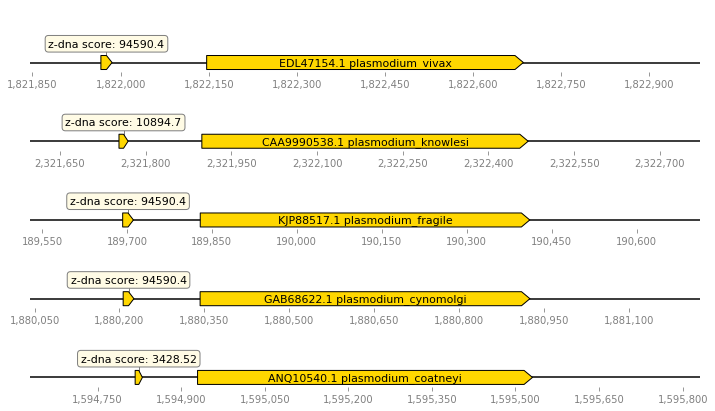

In [266]:
fig, ax = plt.subplots(nrows=5, ncols=1 ,figsize=(12, 7))

for i in range(5):
    record = GraphicRecord(sequence_length=3000000, features=[GraphicFeature(start=gene_coords[i][0], end=gene_coords[i][1], strand=-1 if gene_coords[i][2]=='-' else +1, color="#ffd700", label=gene_coords[i][3].split("\n")[0]+" "+selected_orgs[i]),
                                                             GraphicFeature(start=zdna_coords[i][0], end=zdna_coords[i][1], strand=-1 if gene_coords[i][2]=='-' else +1, color="#ffd700", label=f"z-dna score: {zdna_coords[i][2]}")])
    cropped_record = record.crop((gene_coords[i][0]-300, gene_coords[i][1]+300))
    cropped_record.plot(ax=ax[i])
plt.savefig("clusters.jpg")